In [9]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [10]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import conf_from_yaml, generator_from_conf
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

def queue_generations(*args: str):
    for yaml_path in args:
        conf = conf_from_yaml(yaml_path, repo_root)
        generator = generator_from_conf(conf, repo_root)
        generate_and_analyze(generator, conf)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


seed: 1752214276
Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.3536, node: Cc1nc(N2CCC([C@@H](O)Cc3cccc(F)c3)CC2)c2cc[nH]c2n1
<Best reward updated> 10 - time: 0.15, reward: 0.3617, node: COc1cccc(C(=O)O[C@@H](C)[C@@H]2CCCO2)c1
<Best reward updated> 53 - time: 1.08, reward: 0.3882, node: C[C@H](N(CCC#N)CC(F)(F)F)c1ccc(F)cn1
<Best reward updated> 55 - time: 1.12, reward: 0.4227, node: C[C@H](N(CC(=O)[O-])C(F)(F)F)c1cccc2cccnc12
100 - time: 1.99, average over 100: 0.2365
<Best reward updated> 124 - time: 2.46, reward: 0.4624, node: C[C@H](N(CC(=O)[O-])C1=CC(=O)CC(C)(C)C1)[C@@H](C)c1ccncc1
200 - time: 3.95, average over 100: 0.2723
300 - time: 6.54, average over 100: 0.3841
400 - time: 9.07, average over 100: 0.3413
Generation interrupted by user (KeyboardInterrupt).
Generation finished.


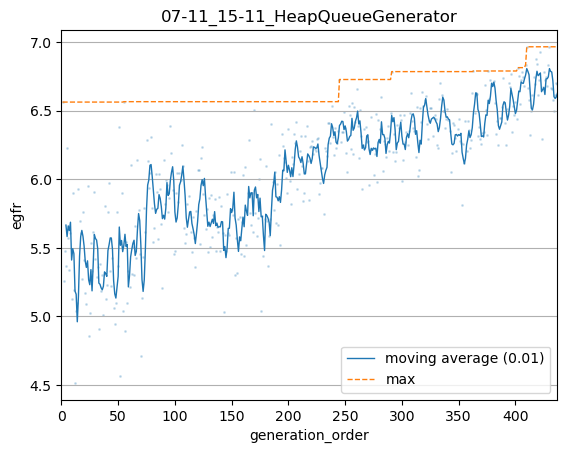

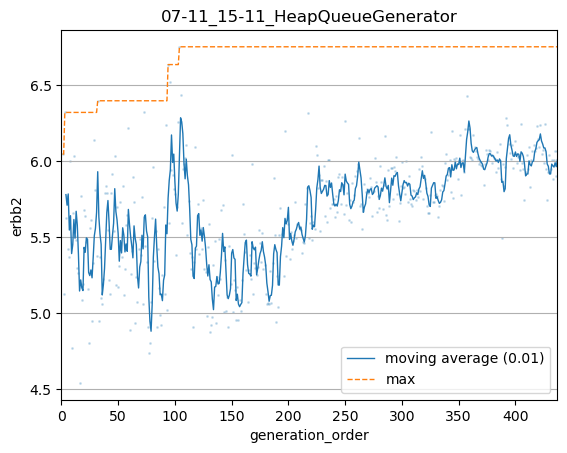

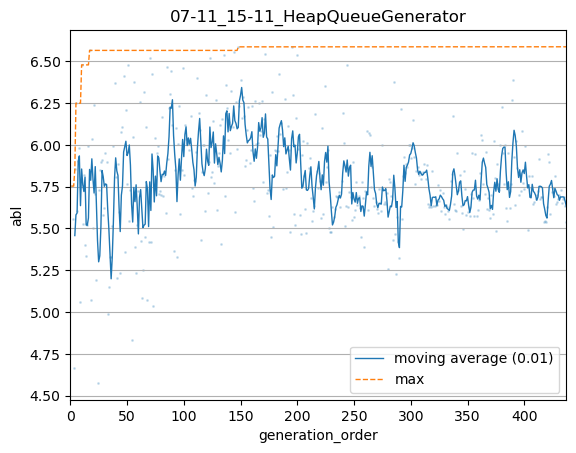

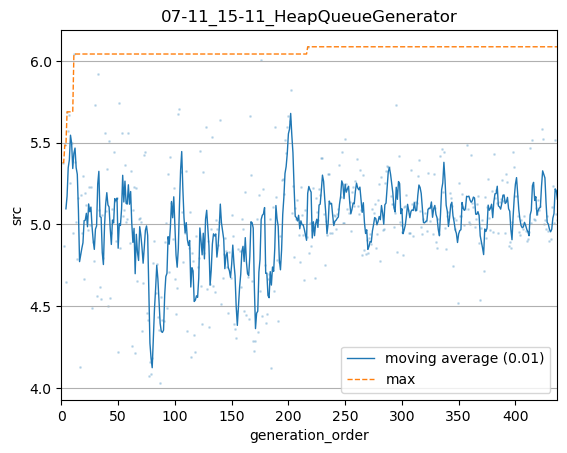

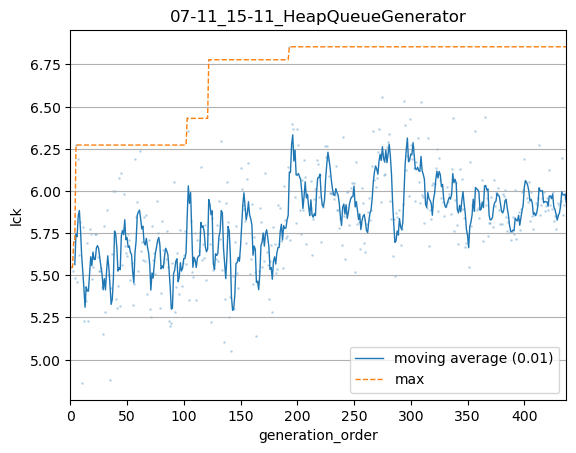

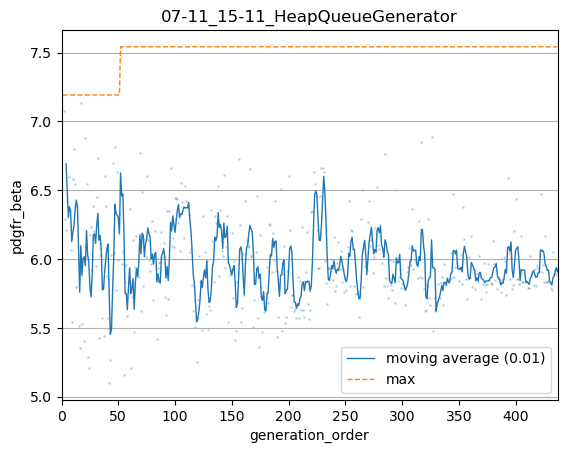

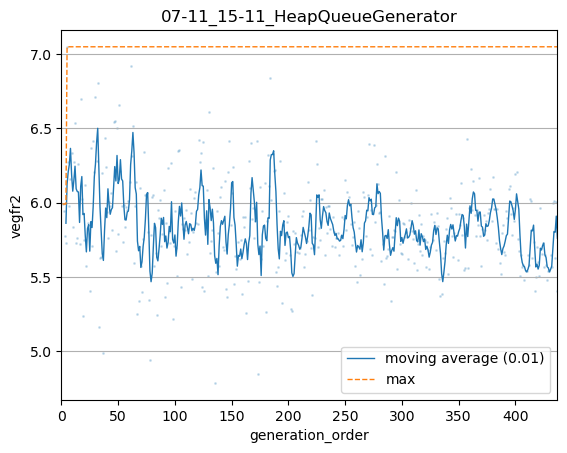

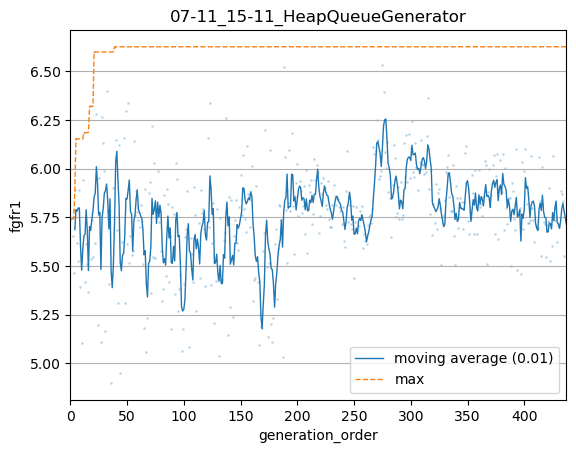

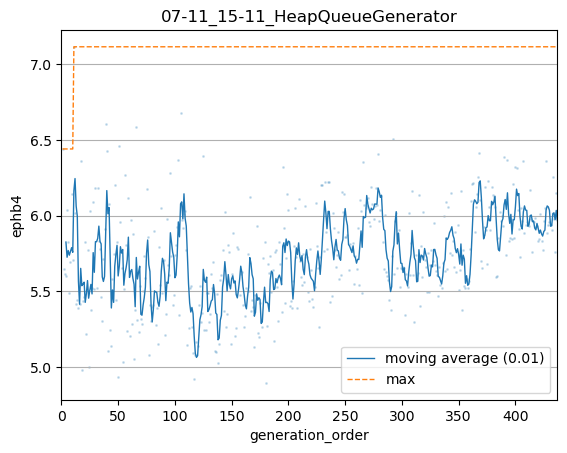

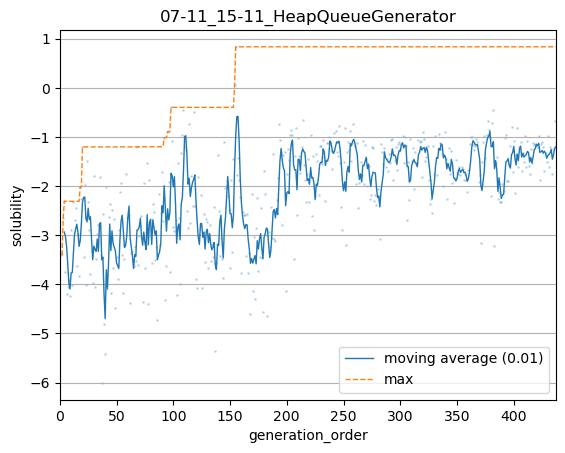

In [ ]:
# start generation

# yaml_path = "config/mcts_helm.yaml"
# yaml_path = "config/mcts_smiles.yaml"
# yaml_path = "config/model_test.yaml"
# yaml_path = "config/mcts_d_score.yaml"
# yaml_path = "config/mcts_biot5.yaml"
# yaml_path = "config/mcts_smirks.yaml"
yaml_path = "config/heapq_smiles.yaml"

conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
# queue_generations(c1, c2)

In [29]:
str(generator.root)

'C'

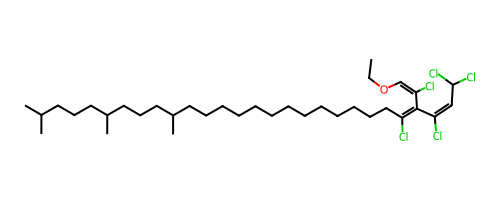

In [14]:
from node import MolStringNode
from language import SELFIES
from utils import draw_mol
x = MolStringNode.node_from_key("[C][C][O][C][=C][Branch1][C][Cl][C][=C][Branch1][C][Cl][C][Branch2][Ring2][=Branch2][C][C][C][C][C][C][C][C][C][C][C][C][C][Branch1][C][C][C][C][C][C][Branch1][C][C][C][C][C][C][Branch1][C][C][C].[Cl][=C][Branch1][C][Cl][C][=C][Ring2][Ring2][C][Cl]", lang=SELFIES())
mol = x.mol()
draw_mol(mol, 500, 200)

In [ ]:
# continue generation
generator.generate(time_limit=conf.get("time_limit") - generator.passed_time, max_generations=conf.get("max_generations") - len(generator.unique_keys))
generator.plot(**conf.get("plot_args", {}))
generator.analyze()

Starting generation...


In [16]:
#save mcts
save_path = generator.output_dir() + "save.mcts"
generator.save(save_path)

In [ ]:
#load generator and yaml
from generator import Generator
load_dir = "generation_result/06-26_08-51/"
conf = conf_from_yaml("sandbox/" + load_dir + "setting.yaml", repo_root)
generator = generator_from_conf(conf, repo_root)
generator = Generator.load(load_dir + "save.mcts", generator.transition)

In [ ]:
#time test
import cProfile
import pstats

profiler = cProfile.Profile()
profiler.enable()
conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
profiler.disable()

stats = pstats.Stats(profiler)
stats.sort_stats("cumtime").print_stats(100)